In [ ]:
import sys
input=sys.stdin.readline

def dfs(C, F, vis, V, u, snk, cur= 1 << 63) :
  if u == snk: return cur

  vis[u] = True
  for v in range(V) :
    if vis[v] or F[u][v] >= C[u][v] : continue
    A = min(cur, C[u][v] - F[u][v])
    tmp = dfs(C, F, vis, V, v, snk, A)
    if tmp :
      F[u][v] += tmp
      F[v][u] -= tmp
      return tmp
  return 0

def fulkerson(capacity, source, sink) :
  V = len(capacity)
  flow = [[0] * V for _ in range(V)]
  ret = 0

  while True :
    vis = [False] * V
    cur = dfs(capacity, flow, vis, V, source, sink)
    if cur == 0 : break
    ret += cur

  return ret

def sol() :
  N, M = map(int, input().split())
  V = N + M + 2
  C = [[0] * V for _ in range(V)] 

  for i in range(N) :
    u = i + 1
    C[0][u] = 1
    _, *l = map(int, input().split())
    for j in l :
      v = N+j
      C[u][v] = 1
  
  for i in range(M) :
    C[N+i+1][-1] = 1

  ans = fulkerson(C, 0, V-1)
  print(ans)
  
sol()

### 풀이
- 이분 매칭이 정해인 문제인듯 하다.
- 정점을 다음과 같이 표현한다
  - (시작점) + (소의 수) + (축사의 수) + (끝점)
  - 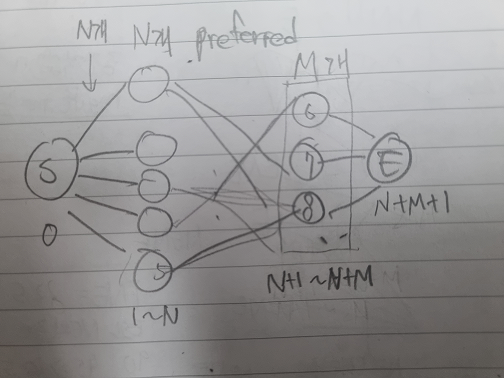
- 위처럼 연결하고 `S`에서 `T`로 가는 최대 유량을 구한다면 자연스럽게 문제의 답이 나오게 된다.